In [4]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

iris = load_iris()
print('target name:', iris.target_names)
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

target name: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


## KMeans 군집을 위해 필요한 파라미터
- `n_clusters` : 군집 중심점(centroid)의 개수를 지정 (군집의 개수를 지정)
- `max_iter` : centroid가 움직이는 과정의 최대 횟수

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

### KMeans 속성(Property) 확인
훈련이 끝난 KMeans 군집 객체에서는 클러스터를 확인할 수 있다.
- `labels_` : 훈련된(`fit`) 데이터에 대한 군집 레이블을 확인
  * 지도학습에서 사용하는 `label` 과 다름
  * 랜덤에서 `label` 부여됨. 사람이 해석

In [6]:
# 각 데이터에 대한 클러스터 번호 확인
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [7]:
# 이 꽃이 몇 번 클러스터에 속하는 꽃일까?
test_iris = np.array([[6.1, 2.5, 3.4, 1.2],
                      [3.8, 4.0, 3.1, 3.3]])
kmeans.predict(test_iris)

array([0, 0], dtype=int32)

In [8]:
# fit_predict : 훈련과 동시에 예측
kmeans.fit_predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [9]:
kmeans.fit_transform(irisDF)  # 가장 가까운 centroid 와의 거리

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

In [10]:
# 실제 target과 군집의 차이를 비교
iris.target, kmeans.labels_

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2

In [11]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [12]:
# target과 cluster 내의 데이터 포인트 개수를 각각 확인
irisDF.groupby(['target', 'cluster'])['sepal_length'].count().to_frame()

sepal_length
target cluster              
0      1                  50
1      0                  48
       2                   2
2      0                  14
       2                  36

In [13]:
# PCA를 이용해 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_1'] = pca_transformed[:, 0]
irisDF['pca_2'] = pca_transformed[:, 1]

irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


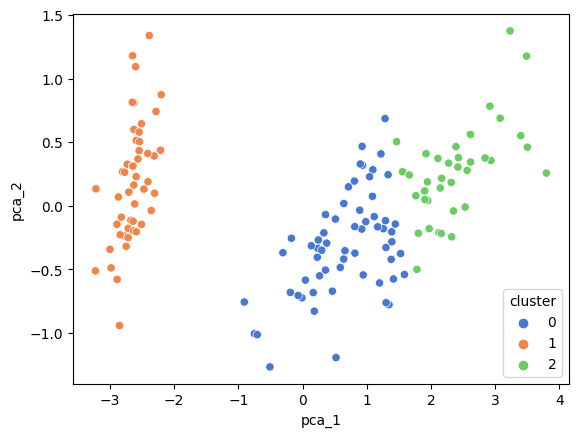

In [14]:
import seaborn as sns

sns.scatterplot(
  x='pca_1',
  y='pca_2',
  hue='cluster',
  palette='muted',
  data=irisDF
)
plt.show()

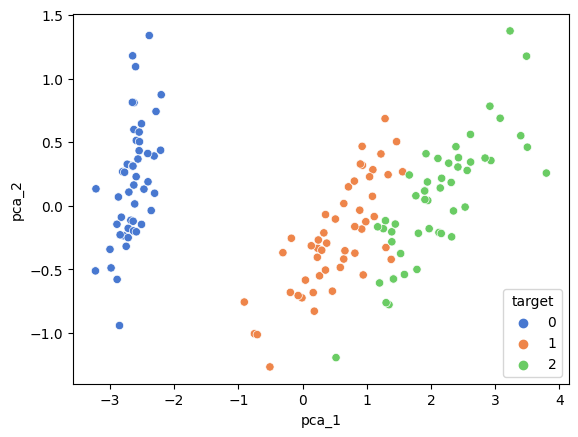

In [15]:
import seaborn as sns

sns.scatterplot(
  x='pca_1',
  y='pca_2',
  hue='target',
  palette='muted',
  data=irisDF
)
plt.show()

## 클러스터링 알고리즘 테스트

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [17]:
import pandas as pd

clusterDF = pd.DataFrame(
  data=X, columns=['x1', 'x2']
)
clusterDF['target'] = y
clusterDF.head()

,x1,x2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


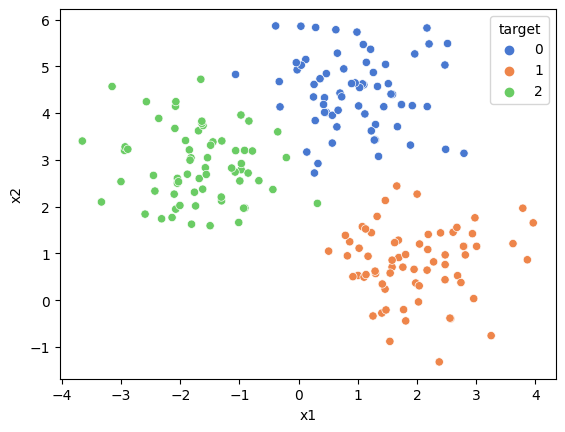

In [18]:
sns.scatterplot(
  x='x1',
  y='x2',
  hue='target',
  palette='muted',
  data=clusterDF
)
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_labels

array([1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0,
       2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0,
       2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       2, 0], dtype=int32)

In [20]:
clusterDF['cluster'] = cluster_labels
clusterDF.head()

,x1,x2,target,cluster
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,2
2,1.100228,4.606317,0,2
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,2


In [21]:
centers = kmeans.cluster_centers_
centers

array([[ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224],
       [ 0.990103  ,  4.44666506]])

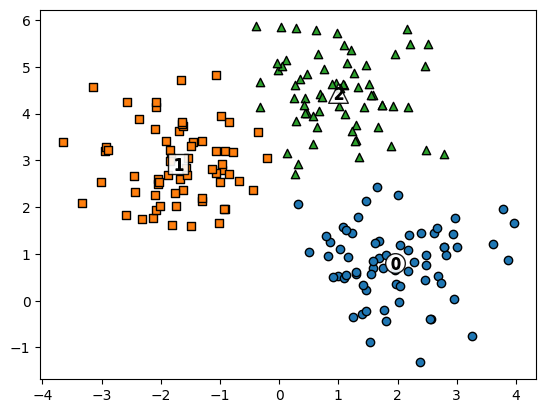

In [22]:
# 클러스터 번호 가져오기
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 종류 별로 반복문을 돌려가면서 Scatter 찍기
for label in unique_labels:
  # 각 레이블에 대한 클러스터 정보
  label_cluster = clusterDF[clusterDF['cluster'] == label]

  plt.scatter(
    x=label_cluster['x1'],
    y=label_cluster['x2'],
    edgecolors='k',
    marker=markers[label]
  )

  # 각 군집의 centroid 구하기
  center_x_y = centers[label]
  plt.scatter(
    x=center_x_y[0],
    y=center_x_y[1],
    s=200,
    color='white', alpha=0.9, edgecolors='k', marker=markers[label]
  )
  plt.scatter(
    x=center_x_y[0],
    y=center_x_y[1],
    s=70,
    color='k', edgecolors='k', marker='$%d$' % label
  )

plt.show()